## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as stats
import seaborn as sns

%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

C:\Users\Trent\Anaconda2\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Trent\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


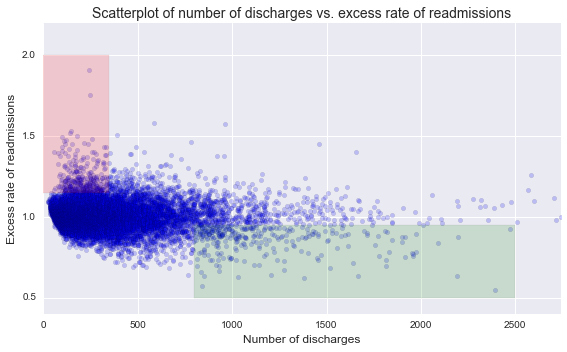

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide supA. Do you agree with the above analysis and recommendations? Why or why not?port for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### A. Do you agree with the above analysis and recommendations? Why or why not?

To start, I want to look closer at the data being used in this analysis. First at the closest level by looking at a few records and then from long-range by modifying the visualization from above. 

In [5]:
clean_hospital_read_df[:][81:-3].head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [6]:
len(clean_hospital_read_df)

11578

In [7]:
len(clean_hospital_read_df)-len(clean_hospital_read_df['Excess Readmission Ratio'].dropna())

81

A smaller issue with the analysis is that there are 81 missing records in the Excess Readmission Ratio column. Since that's such a small portion of the 11,578 total records, those rows will be dropped from the dataframe for my analysis.

In [8]:
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

In [9]:
clean_hospital_read_df.shape

(11497, 12)

One glaring issue with the preliminary report above is that Section B looks at hospitals/facilities with number of discharges < 100 and also those with number of discharges > 1000, but for some unknown reason it doesn't look at hospitals/facilities in the middle--those with number of discharges >= 100 and <= 1000. That segment of the data accounts for almost 10,000 of the 11,500 records.

In [10]:
print "Number of records < 100:             ", len(clean_hospital_read_df['Excess Readmission Ratio']\
                                                 [clean_hospital_read_df['Number of Discharges'] < 100][81:-3])
print "Number of records >= 100 and <= 1000:", len(clean_hospital_read_df['Excess Readmission Ratio']\
                                                 [(clean_hospital_read_df['Number of Discharges'] >= 100)\
                                                 & (clean_hospital_read_df['Number of Discharges'] <= 1000)][81:-3])
print "Number of records > 1000:            ", len(clean_hospital_read_df['Excess Readmission Ratio']\
                                                 [clean_hospital_read_df['Number of Discharges'] > 1000][81:-3])       

Number of records < 100:              1104
Number of records >= 100 and <= 1000: 9762
Number of records > 1000:             379


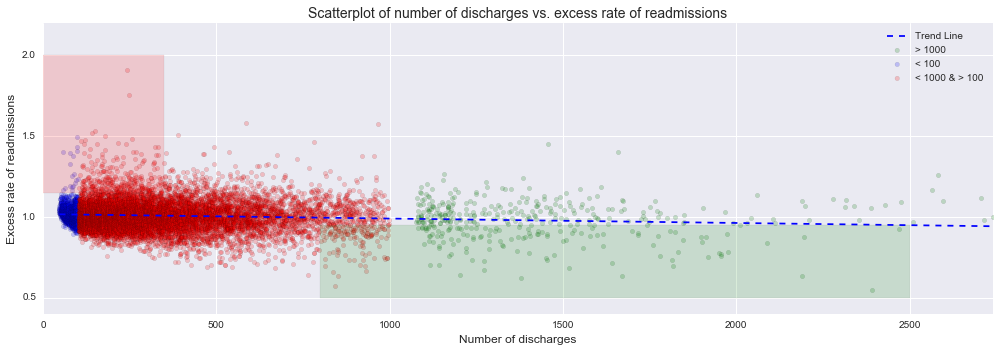

In [11]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x1 = [a for a in clean_hospital_read_df['Number of Discharges']\
                                       [clean_hospital_read_df['Number of Discharges'] > 1000][81:-3]]
y1 = list(clean_hospital_read_df['Excess Readmission Ratio']\
                                [clean_hospital_read_df['Number of Discharges'] > 1000][81:-3])

x2 = [a for a in clean_hospital_read_df['Number of Discharges']\
                                       [clean_hospital_read_df['Number of Discharges'] < 100][81:-3]]
y2 = list(clean_hospital_read_df['Excess Readmission Ratio']\
                                [clean_hospital_read_df['Number of Discharges'] < 100][81:-3])

x3 = [a for a in clean_hospital_read_df['Number of Discharges']\
                                       [(clean_hospital_read_df['Number of Discharges'] <= 1000) \
                                       & (clean_hospital_read_df['Number of Discharges'] >= 100)][81:-3]]
y3 = list(clean_hospital_read_df['Excess Readmission Ratio']\
                                [(clean_hospital_read_df['Number of Discharges'] <= 1000) \
                                & (clean_hospital_read_df['Number of Discharges'] >= 100)][81:-3])

# adding a trend line
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

z = np.polyfit(x, y, 1)
p = np.poly1d(z)


fig, ax = plt.subplots(figsize=(14,5))
ax.scatter(x1, y1,alpha=0.2, c='g')
ax.scatter(x2, y2, alpha=.2, c='b')
ax.scatter(x3, y3, alpha=.2, c='r')

ax.plot(x,p(x),"b--")

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.legend(['Trend Line', '> 1000', '< 100', '< 1000 & > 100'])

ax.grid(True)
fig.tight_layout()

In section **B. Statistics** from the analysis above, they make two claims:

> In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 

>  In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

I would like to double check their calculations:

In [12]:
mean_rate_small = clean_hospital_read_df['Excess Readmission Ratio']\
                                                     [clean_hospital_read_df['Number of Discharges'] < 100][81:-3].mean()
excess_percentage_small = len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]\
                                                          [clean_hospital_read_df['Excess Readmission Ratio'] > 1]) \
                                                          /float(len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]))
    
mean_rate_big = clean_hospital_read_df['Excess Readmission Ratio']\
                                                     [clean_hospital_read_df['Number of Discharges'] > 1000][81:-3].mean()
excess_percentage_big = len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]\
                                                          [clean_hospital_read_df['Excess Readmission Ratio'] > 1]) \
                                                          /float(len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]))
    
print "Mean excess readmission rate in hospitals/facilities with < 100 discharges: ", mean_rate_small
print "Excess readmission rate greater than 1 in hospitals/facilities with < 100 discharges: ", excess_percentage_small
print
print "Mean excess readmission rate in hospitals/facilities with > 1000 discharges: ", mean_rate_big
print "Excess readmission rate greater than 1 in hospitals/facilities with > 1000 discharges: ", excess_percentage_big

Mean excess readmission rate in hospitals/facilities with < 100 discharges:  1.0198115942
Excess readmission rate greater than 1 in hospitals/facilities with < 100 discharges:  0.632154882155

Mean excess readmission rate in hospitals/facilities with > 1000 discharges:  0.981841688654
Excess readmission rate greater than 1 in hospitals/facilities with > 1000 discharges:  0.444924406048


C:\Users\Trent\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Trent\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


These numbers are very close and the differences could be explained by the records that were removed earlier.

### 1) Setup an appropriate hypothesis test.

The null hypothesis for this test is that the probability of the excess readmission ratio for hospitals/facilites in the upper half (by number of discharges) being over 1 is the same as the probability of excess readmission ratio for hospitals/facilities in the lower half (by number of discharges) in terms of number of discharges being over 1. The alternative hypothesis is that the rates are significantly different.

I will use the median number of discharges (282) to create two groups of nearly the same size:

In [13]:
discharge_median = clean_hospital_read_df['Number of Discharges'].median()

larger_hospitals_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= discharge_median]
smaller_hospitals_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < discharge_median]

larger_hospitals_percent = len(larger_hospitals_df['Excess Readmission Ratio'][larger_hospitals_df['Excess Readmission Ratio'] > 1]) / float(len(larger_hospitals_df))
smaller_hospitals_percent = len(smaller_hospitals_df['Excess Readmission Ratio'][smaller_hospitals_df['Excess Readmission Ratio'] > 1]) / float(len(smaller_hospitals_df))

larger_hospitals_count = len(larger_hospitals_df)
smaller_hospitals_count = len(smaller_hospitals_df)

larger_hospitals_mean = larger_hospitals_df['Excess Readmission Ratio'].mean()
smaller_hospitals_mean = smaller_hospitals_df['Excess Readmission Ratio'].mean()

print "Observations in upper_half_df:", larger_hospitals_count
print "Percent of larger hospitals with excess readmission rate greater than 1:", larger_hospitals_percent
print "Mean excess readmission ratio in larger hospitals:", larger_hospitals_mean
print
print "Observations in lower_half_df:", smaller_hospitals_count
print "Percent of smaller hospitals with excess readmission rate greater than 1:", smaller_hospitals_percent
print "Mean excess readmission ratio in smaller hospitals:", smaller_hospitals_mean

Observations in upper_half_df: 5749
Percent of larger hospitals with excess readmission rate greater than 1: 0.494868672813
Mean excess readmission ratio in larger hospitals: 1.00050361802

Observations in lower_half_df: 5748
Percent of smaller hospitals with excess readmission rate greater than 1: 0.538274182324
Mean excess readmission ratio in smaller hospitals: 1.01450516701


To check if the Central Limit Theorem (CLT) applies I'll follow the rule of thumb that if np >= 10 and np(1-p) >= 10, then our sample size is large enough to use the normal approximation. This is demonstrated below.

In [14]:
print larger_hospitals_count*larger_hospitals_percent
print larger_hospitals_count*(1-larger_hospitals_percent)
print smaller_hospitals_count*smaller_hospitals_percent
print smaller_hospitals_count*(1-smaller_hospitals_percent)

2845.0
2904.0
3094.0
2654.0


Running _scipy.stats.normaltest_ shows p-values approaching zero on both groups, so we will proceed.

In [15]:
print 'Large hospitals p-value:', stats.normaltest(larger_hospitals_df['Excess Readmission Ratio'])
print 'Small hospitals p-value:', stats.normaltest(smaller_hospitals_df['Excess Readmission Ratio'])

Large hospitals p-value: NormaltestResult(statistic=237.09346834835591, pvalue=3.2794989825705862e-52)
Small hospitals p-value: NormaltestResult(statistic=1969.5177286815015, pvalue=0.0)


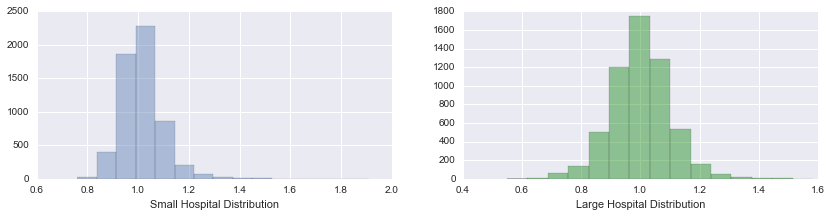

In [19]:
f, axes = plt.subplots(1, 2, figsize=(14, 3))

sns.distplot(smaller_hospitals_df['Excess Readmission Ratio'], kde=False, bins=15, ax=axes[0], axlabel="Small Hospital Distribution")

sns.distplot(larger_hospitals_df['Excess Readmission Ratio'], color='green', kde=False, bins=15, ax=axes[1], axlabel="Large Hospital Distribution")

### 2) Compute and report the observed significance value (or p-value).

In [22]:
large_hospital_readmissions = larger_hospitals_df['Excess Readmission Ratio']
small_hospital_readmissions = smaller_hospitals_df['Excess Readmission Ratio']

t = stats.ttest_ind(large_hospital_readmissions, small_hospital_readmissions, equal_var = False)
tstat = t[0]
pval = t[1]

print tstat, pval

large_hospital_readmissions.std()

-8.18596754496 2.99765903535e-16


0.1004183909634715

In [24]:
z = 2.58 #z-value for a 99% confidence

stdev_l = larger_hospitals_percent * (1-larger_hospitals_percent)
stdev_s = smaller_hospitals_percent * (1-smaller_hospitals_percent)

mean_diff = larger_hospitals_percent - smaller_hospitals_percent

margin_of_error = z * np.sqrt(stdev_l/len(larger_hospitals_df) + stdev_s/len(smaller_hospitals_df))

lower_bound = mean_diff - z * margin_of_error
upper_bound = mean_diff + z * margin_of_error
conf_interval = [lower_bound, upper_bound]

print 'margin of error:', margin_of_error
print 'confidence interval:', conf_interval

margin of error: 0.0240258510809
confidence interval: [-0.10539220530021899, 0.018581186276971709]


### 3) Report statistical significance for $\alpha$ = .01. 

### 4) Discuss statistical significance and practical significance